In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('./ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('./ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [5]:
data = pd.merge(pd.merge(ratings, users), movies)

In [6]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
data_unique = data.set_index(data.columns.drop('genres',1).tolist()).genres.str.split('|', expand=True).stack().reset_index().rename(columns={0:'genres'}).loc[:, data.columns]

In [8]:
data_unique

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


[10 pts] An aggregate of the movie ratings for each particular genre.

In [13]:
agg_by_genre = data_unique.groupby('genres').agg({'rating': [np.mean]})
agg_by_genre

,rating
,mean
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332


In [9]:
mean_ratings = data_unique.pivot_table('rating', index=['genres','gender'], aggfunc='mean')

In [10]:
mean_ratings

rating
genres      gender          
Action      F       3.490252
            M       3.491386
Adventure   F       3.512879
            M       3.468125
Animation   F       3.744702
            M       3.661335
Children's  F       3.572548
            M       3.358961
Comedy      F       3.571938
            M       3.503667
Crime       F       3.689332
            M       3.713720
Documentary F       3.946392
            M       3.928811
Drama       F       3.765662
            M       3.766589
Fantasy     F       3.513076
            M       3.426603
Film-Noir   F       4.018087
            M       4.092254
Horror      F       3.202870
            M       3.217891
Musical     F       3.809108
            M       3.596332
Mystery     F       3.686548
            M       3.662009
Romance     F       3.673579
            M       3.573262
Sci-Fi      F       3.450255
            M       3.469952
Thriller    F       3.573360
            M       3.569685
War         F       3.893138
            M       3.893375
Western     F       3.551913
            M       3.655120

In [15]:
mean_ratings_female = mean_ratings.query('gender == ["F"]')

In [17]:
mean_ratings_female[:5]

,,rating
genres,gender,
Action,F,3.490252
Adventure,F,3.512879
Animation,F,3.744702
Children's,F,3.572548
Comedy,F,3.571938


[10 pts] The top 5 highest ranked genre by women.


In [19]:
top_female_ratings = mean_ratings_female.sort_values(by='rating', ascending=False)
top_female_ratings.head()

,,rating
genres,gender,
Film-Noir,F,4.018087
Documentary,F,3.946392
War,F,3.893138
Musical,F,3.809108
Drama,F,3.765662


[10 pts] The top 5 highest ranked genre by men.

In [13]:
top_male_ratings = mean_ratings_male.sort_values(by='rating', ascending=False)
top_male_ratings.head()

,,rating
genres,gender,
Film-Noir,M,4.092254
Documentary,M,3.928811
War,M,3.893375
Drama,M,3.766589
Crime,M,3.713720


[20 pts] A breakdown of a movies ratings by age, use any movie of your choice.

In [21]:
most_50 = data_unique.groupby(['movie_id']).size().sort_values(ascending=False)[:50]

In [22]:
most_50

movie_id
1196    14950
1210    14415
260     11964
1580    10152
1197     9272
1617     9152
1097     9076
2628     9000
1214     8096
480      8016
2916     7984
2028     7959
589      7947
2571     7770
608      7539
110      7329
1200     7280
919      6872
924      6864
1127     6860
2858     6856
858      6669
356      6582
2000     6508
1240     6294
1        6231
592      5724
380      5600
2699     5468
588      5404
2987     5397
2406     5380
1259     5355
34       5253
1073     5252
2054     5225
780      5190
3175     5184
2081     5175
1270     5166
593      5156
2355     5109
1221     5076
1198     5028
1544     5020
912      5007
377      4950
2657     4932
3114     4755
2396     4738
dtype: int64

In [28]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_unique['age_group'] = pd.cut(data_unique.age, range(0, 81, 10), right=False, labels=labels)
data_unique[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49
20,35,30-39


In [29]:
by_age = data_unique[data_unique['movie_id']==2858].groupby(['title', 'age_group'])
by_age.rating.agg({'rating': [np.mean, min, max, np.median]})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


rating               
                                      mean min max median
title                  age_group                         
American Beauty (1999) 0-9        4.434783   1   5      5
                       10-19      4.521678   1   5      5
                       20-29      4.330585   1   5      5
                       30-39      4.231156   1   5      5
                       40-49      4.151163   1   5      4
                       50-59      4.131944   1   5      4

[30 pts] A function that given a user id and movie id , returns a list of user ids for
other users that rated the movie identi_ed by the provided movie id with the same score.

In [30]:
def same_ratings(uid, mid):
    user_ids = []
    select_row =  data_unique[(data_unique['user_id']==uid) & (data_unique['movie_id']==mid)]
    umrating = select_row.rating[0]
    select_users = data_unique[(data_unique['rating']==umrating) & (data_unique['movie_id']==mid)]
    return select_users.user_id

In [31]:
print(same_ratings(1,1193))

0          1
1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
60       235
61       236
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, Length: 937, dtype: int64


[20 pts] Some other statistic, _gure, aggregate, or plot that you created using this dataset,
along with a short description of what interesting observations you derived from it.

In [20]:
by_age = data_unique.loc[most_50.index].groupby(['title', 'age_group'])
#fig, ax = plt.subplots(figsize=(15,7))
by_age.rating.mean()

title                                   age_group
James and the Giant Peach (1996)        0-9          4.000000
                                        10-19        3.833333
                                        20-29        3.000000
                                        30-39        5.000000
One Flew Over the Cuckoo's Nest (1975)  10-19        4.750000
                                        20-29        4.000000
                                        30-39        4.100000
                                        40-49        4.750000
                                        50-59        4.800000
Name: rating, dtype: float64

We can observe here that the mean ratings for the movies which are scored by most of the people varies between 3 to 4.75

In [21]:
by_age.rating.max()

title                                   age_group
James and the Giant Peach (1996)        0-9          4
                                        10-19        4
                                        20-29        4
                                        30-39        5
One Flew Over the Cuckoo's Nest (1975)  10-19        5
                                        20-29        5
                                        30-39        5
                                        40-49        5
                                        50-59        5
Name: rating, dtype: int64

We can observe here that the maximum ratings for the movies which are scored by most of the people varies between 4 and 5

In [22]:
by_age.rating.min()

title                                   age_group
James and the Giant Peach (1996)        0-9          4
                                        10-19        3
                                        20-29        2
                                        30-39        5
One Flew Over the Cuckoo's Nest (1975)  10-19        4
                                        20-29        3
                                        30-39        2
                                        40-49        3
                                        50-59        4
Name: rating, dtype: int64

We can observe here that the mean ratings for the movies which are scored by most of the people varies between 2 to 4

In [23]:
by_age.rating.std()

title                                   age_group
James and the Giant Peach (1996)        0-9               NaN
                                        10-19        0.408248
                                        20-29        0.755929
                                        30-39             NaN
One Flew Over the Cuckoo's Nest (1975)  10-19        0.500000
                                        20-29        0.816497
                                        30-39        0.994429
                                        40-49        0.707107
                                        50-59        0.447214
Name: rating, dtype: float64

We observe here that a lot of age groups for various movies have a standard deviation of zero which means the ratings there were equal to mean.

In [24]:
by_age.rating.quantile()

title                                   age_group
James and the Giant Peach (1996)        0-9          4.0
                                        10-19        4.0
                                        20-29        3.0
                                        30-39        5.0
One Flew Over the Cuckoo's Nest (1975)  10-19        5.0
                                        20-29        4.0
                                        30-39        4.0
                                        40-49        5.0
                                        50-59        5.0
Name: rating, dtype: float64

This is the distribution of rating according to the age group for top 50 rated movies for the first quantile

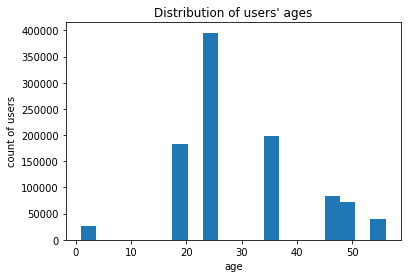

In [25]:
data.age.plot.hist(bins=20)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

We observe that the largest amount of users were in the age group 20-29.

In [26]:
pivoted = data_unique.pivot_table(index=['movie_id', 'title'],
                           columns=['gender'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,gender,F,M
movie_id,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [27]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


In [28]:
pivoted.reset_index('movie_id', inplace=True)

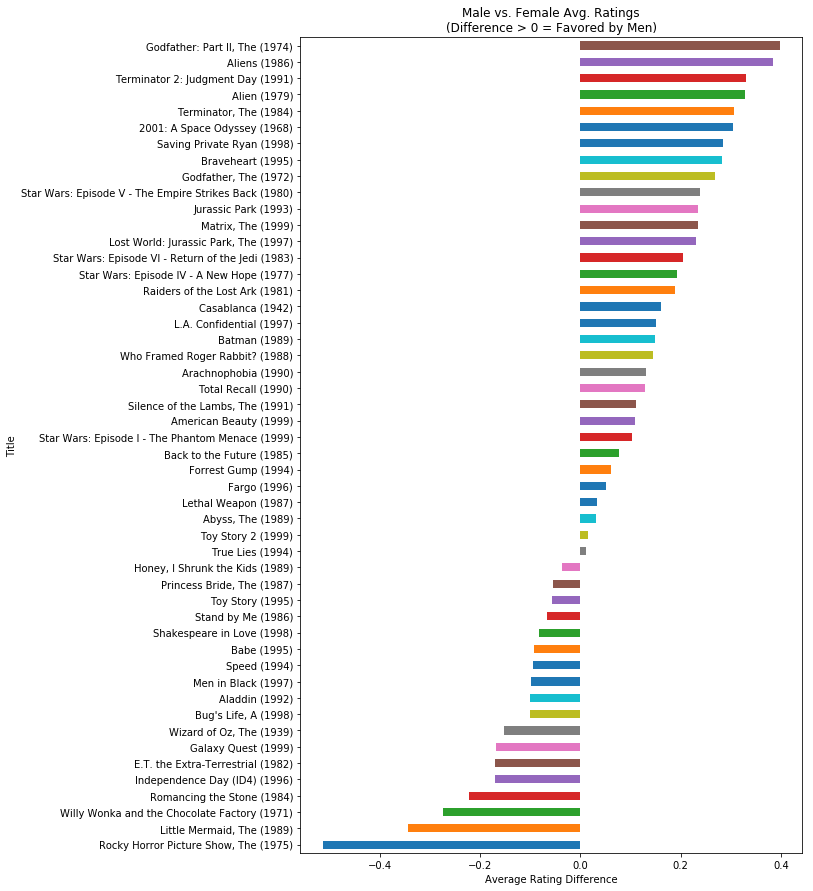

In [29]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

We observe that while "Independence Day" was most favored by women, "Airplane!" were most favored by men.

In [30]:
mean_ratings_title = data_unique.pivot_table('rating', index=['title'], columns='gender', aggfunc='mean')

In [31]:
mean_ratings_title.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


These are the mean ratings given by men and women according to title of the movies.

In [32]:
agg_title = data_unique.groupby('title').agg({'rating': [np.size, np.mean]})

In [33]:
agg_title.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            74  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)        104  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    398  3.713568

In [34]:
# sort by rating average
agg_title.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                           size mean
title                               
Ulysses (Ulisse) (1954)       1  5.0
Lured (1947)                  1  5.0
Follow the Bitch (1998)       1  5.0
Bittersweet Motel (2000)      1  5.0
Song of Freedom (1936)        1  5.0

These are the mean of the movies with highest ratings. But as we observed, there was only single entry for each of them, this data is not of much use.

So instead, lets consider only the movies which have been rated by atleast 100 users.

In [35]:
atleast_100 = agg_title['rating']['size'] >= 100
agg_title[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                                     size      mean
title                                                              
Sanjuro (1962)                                        138  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...   1256  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                6669  4.524966
Close Shave, A (1995)                                1971  4.520548
Usual Suspects, The (1995)                           3566  4.517106
Schindler's List (1993)                              4608  4.510417
Wrong Trousers, The (1993)                           1764  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       5028  4.477725
Rear Window (1954)                                   2100  4.476190
Paths of Glory (1957)                                 460  4.473913
Star Wars: Episode IV - A New Hope (1977)           11964  4.453694
Third Man, The (1949)                                 960  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   2734  4.449890

We observe that the highest mean observed is for the movie Sanjuro which is 4.60. 

In [36]:
agg_title[atleast_100].sort_values([('rating', 'mean')], ascending=True)[:15]

rating          
                                                 size      mean
title                                                          
Turbo: A Power Rangers Movie (1997)               132  1.318182
Kazaam (1996)                                     360  1.466667
Digimon: The Movie (2000)                         129  1.488372
Iron Eagle IV (1995)                              116  1.603448
Battlefield Earth (2000)                          684  1.611111
Mighty Morphin Power Rangers: The Movie (1995)    186  1.612903
Pokémon the Movie 2000 (2000)                     200  1.620000
Aces: Iron Eagle III (1992)                       250  1.640000
Police Academy 6: City Under Siege (1989)         149  1.657718
Lawnmower Man 2: Beyond Cyberspace (1996)         194  1.670103
Puppet Master 5: The Final Chapter (1994)         162  1.685185
King Kong Lives (1986)                            174  1.689655
Baby Geniuses (1999)                              164  1.701220
Carnosaur (1993)                                  154  1.727273
Free Willy 3: The Rescue (1997)                   195  1.738462

And the lowest goes as low as 1.31 for the movie Turbo: A Power Rangers Movie

For this EDA, we need to come up with a question. This time, our question will be:

1. What age group likes animation movies the most?
2. What is the most favorite animation movies for each age group?

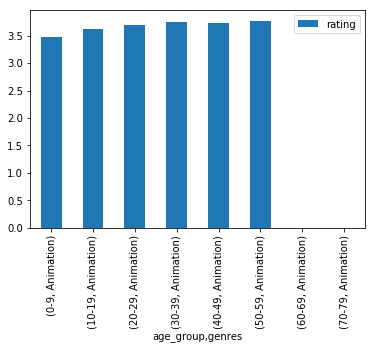

In [42]:
# For the first question
data_subset = data_unique[['age_group', 'genres', 'rating']]
data_animation = data_subset['Animation' == data_subset['genres']]
mean_rating_by_age_group = data_animation.groupby(['age_group', 'genres']).mean()
bar_plot = mean_rating_by_age_group.plot.bar()

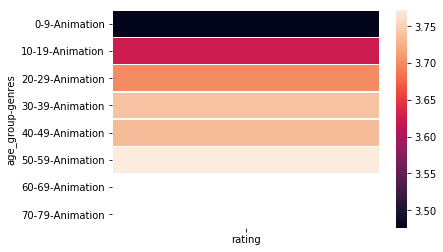

In [43]:
import seaborn as sns
#same data plotted using heatmap
ax = sns.heatmap(mean_rating_by_age_group, linewidth=0.5)
plt.show()

From the graph, we can see that the age group for age 0 - 9 gives the lowest rating for animation movie. Older age group appreciate animation movies more.

In [44]:
# For the second question
data_subset = data_unique[['age_group', 'genres', 'rating', 'title']]
data_animation = data_subset['Animation' == data_subset['genres']]
mean_rating_by_age_group = data_animation.groupby(['age_group', 'title']).mean().sort_values(by='rating', ascending=False).groupby(['age_group']).head(1)

In [45]:
mean_rating_by_age_group

,,rating
age_group,title,
50-59,"Wrong Trousers, The (1993)",4.676471
40-49,"Wrong Trousers, The (1993)",4.647059
0-9,"Princess Mononoke, The (Mononoke Hime) (1997)",4.636364
10-19,"Close Shave, A (1995)",4.568000
20-29,"Close Shave, A (1995)",4.543860
30-39,I Married A Strange Person (1997),4.500000
60-69,101 Dalmatians (1961),NaN
70-79,101 Dalmatians (1961),NaN



From the table, we can see that most people like Wrong Trousers, The (1993).